In [1]:
import csv
import pprint
data_avocados = list(csv.DictReader(open('avocado.csv'))) 
for a in data_avocados:
    a.popitem(last=False)
    d_lists=a['Date'].split('-')
    a['month']=d_lists[1]
pprint.pprint(data_avocados[0])

OrderedDict([('Date', '2015-12-27'),
             ('AveragePrice', '1.33'),
             ('Total Volume', '64236.62'),
             ('4046', '1036.74'),
             ('4225', '54454.85'),
             ('4770', '48.16'),
             ('Total Bags', '8696.87'),
             ('Small Bags', '8603.62'),
             ('Large Bags', '93.25'),
             ('XLarge Bags', '0.0'),
             ('type', 'conventional'),
             ('year', '2015'),
             ('region', 'Albany'),
             ('month', '12')])


In [2]:
len(data_avocados)

18249

In [3]:
import matplotlib.pyplot as plt
import numpy as np
DEFAULT_VALUE = np.nan

def clean(data, column_key, convert_function, default_value):
    special_values= {}
    for row in data:
        old_value = row[column_key]
        new_value = default_value
        try:
            if old_value in special_values.keys():
                new_value = special_values[old_value]
            else:
                new_value = convert_function(old_value)
        except (ValueError, TypeError):
            print('Replacing {} with {} in column {}'.format(row[column_key], new_value, column_key))
        row[column_key] = new_value

In [4]:
clean(data_avocados,'AveragePrice',float,DEFAULT_VALUE)
clean(data_avocados,'Total Volume',float,DEFAULT_VALUE)
clean(data_avocados,'4046',float,DEFAULT_VALUE)
clean(data_avocados,'4225',float,DEFAULT_VALUE)
clean(data_avocados,'4770',float,DEFAULT_VALUE)
clean(data_avocados,'Total Bags',float,DEFAULT_VALUE)
clean(data_avocados,'Small Bags',float,DEFAULT_VALUE)
clean(data_avocados,'Large Bags',float,DEFAULT_VALUE)
clean(data_avocados,'XLarge Bags',float,DEFAULT_VALUE)
clean(data_avocados,'year',int,DEFAULT_VALUE)
clean(data_avocados,'month',int,DEFAULT_VALUE)



In [10]:

v = []
dic={}
for row in data_avocados:
    v.append(row['AveragePrice'])
IQR=np.percentile(v,75)-np.percentile(v,25)
lower=np.percentile(v,25)-1.5*IQR
upper=np.percentile(v,75)+1.5*IQR
for a in data_avocados:
    if a['AveragePrice']<lower or a['AveragePrice']>upper:
        data_avocados.remove(a)
v = []
for row in data_avocados:
    v.append(row['AveragePrice'])
freqs, bins = np.histogram(v, bins=5,range=(0,5))
for i, freq in enumerate(freqs):
    bin_str = '[{}..{}]'.format(int(bins[i]), int(bins[i+1]))
    dic[bin_str]=freq
    print(bin_str, ':', freq)
len(data_avocados)

[0..1] : 2796
[1..2] : 14009
[2..3] : 1224
[3..4] : 0
[4..5] : 0


18029

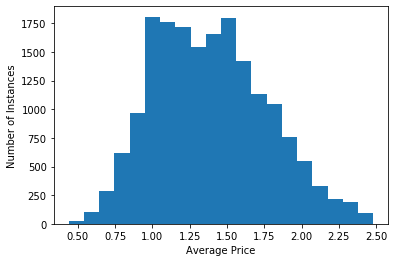

In [11]:

plt.hist(v,bins=20)
plt.xlabel('Average Price')
plt.ylabel('Number of Instances')
plt.show()

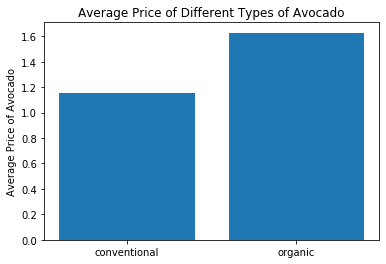

In [12]:
dic={}
length={}
avg={}
for row in data_avocados:
    if row['type'] in dic:
        dic[row['type']]+=row['AveragePrice']
        length[row['type']]+=1

    else:
        dic[row['type']]=row['AveragePrice']
        length[row['type']]=1

for key in dic.keys():
    avg[key]=dic[key]/length[key]
plt.bar(avg.keys(),avg.values())
plt.title('Average Price of Different Types of Avocado')
plt.ylabel('Average Price of Avocado')
plt.show()

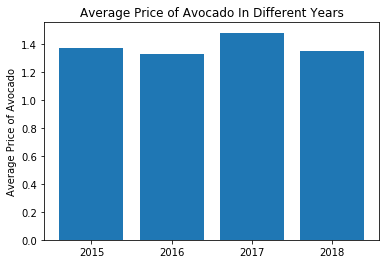

In [13]:
dic={}
length={}
avg={}
for row in data_avocados:
    if row['year'] in dic:
        dic[row['year']]+=row['AveragePrice']
        length[row['year']]+=1

    else:
        dic[row['year']]=row['AveragePrice']
        length[row['year']]=1
for key in dic.keys():
    avg[key]=dic[key]/length[key]
plt.bar(avg.keys(),avg.values())
plt.ylabel('Average Price of Avocado')
plt.title('Average Price of Avocado In Different Years')
plt.xticks([i for i in dic.keys()])
plt.show()

In [14]:
!jupyter nbconvert --to html Assignment_stage1.ipynb

[NbConvertApp] Converting notebook Assignment_stage1.ipynb to html
[NbConvertApp] Writing 331011 bytes to Assignment_stage1.html
